In [4]:
!pip install --upgrade pandas_datareader

[*********************100%***********************]  6 of 6 completed


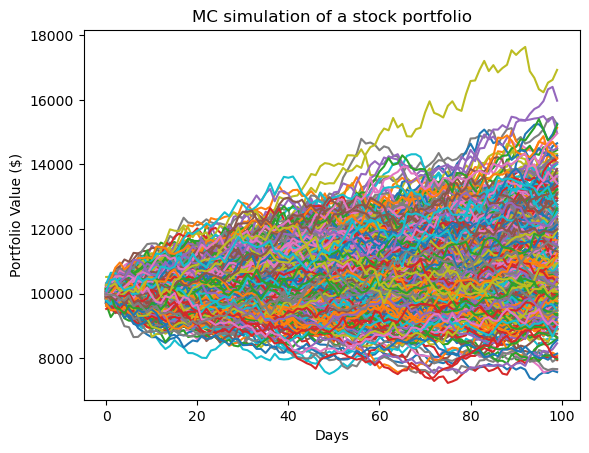

In [10]:
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# Import data
def getData(stocks, start, end):
    stockData = yf.download(stocks, start=start, end=end)['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return returns, meanReturns, covMatrix

# Portfolio Performance
def portfolioPerformance(weights, meanReturns, covMatrix, Time):
    returns = np.sum(meanReturns * weights) * Time
    std = np.sqrt(np.dot(weights.T, np.dot(covMatrix, weights))) * np.sqrt(Time)
    return returns, std

stockList = ['2330', '2317', '2454', '2382', '2308', '2303']
stocks = [stock + '.TW' for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=800)

returns, meanReturns, covMatrix = getData(stocks, start=startDate, end=endDate)
returns = returns.dropna()

weights = np.random.random(len(returns.columns))
weights /= np.sum(weights)

returns['portfolio'] = returns.dot(weights)

# Monte Carlo Method
mc_sims = 400 # number of simulations
T = 100 # timeframe in days

meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns.values) 
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

initialPortfolio = 10000

for m in range(mc_sims):
    # MC loops
    Z = np.random.normal(size=(T, len(weights))) # random shocks
    L = np.linalg.cholesky(covMatrix) # correlation between stocks
    dailyReturns = meanM + L @ Z.T  
    portfolio_sims[:, m] = np.cumprod(np.dot(weights, dailyReturns) + 1) * initialPortfolio

plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()
